In [266]:
#import the needed librairies
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import datetime as dt

In [267]:
#import the data
df_full= pd.read_csv("..\data\Crime_Data_from_2020_to_Present.csv")
print(f"   📊 Dimensions totales: {df_full.shape[0]:,} lignes × {df_full.shape[1]} colonnes")
print(f"   💾 Taille mémoire: {df_full.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\yomna\AppData\Local\Temp\ipykernel_21884\4221075452.py:2: SyntaxWarning: invalid escape sequence '\d'
  df_full= pd.read_csv("..\data\Crime_Data_from_2020_to_Present.csv")


   📊 Dimensions totales: 1,004,876 lignes × 28 colonnes
   💾 Taille mémoire: 863.62 MB


In [268]:
df_full["Date Rptd"] = pd.to_datetime(df_full["Date Rptd"])

# Trier par Date Rptd
df1 = df_full.sort_values("Date Rptd")

# Prendre les 400 premières lignes
df_first400 = df1.head(400)

C:\Users\yomna\AppData\Local\Temp\ipykernel_21884\2963966817.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_full["Date Rptd"] = pd.to_datetime(df_full["Date Rptd"])


In [269]:
# Définir le nombre de lignes à extraire
n_rows = 400000
if len(df_full) >= n_rows:
    df_400k = df_full.head(n_rows).copy()
    print(f"\n✅ Extraction réussie de {n_rows:,} lignes ({(n_rows/len(df_full)*100):.1f}% du total)")
print(f"📊 Dimensions extraites: {df_400k.shape[0]:,} lignes × {df_400k.shape[1]} colonnes")


✅ Extraction réussie de 400,000 lignes (39.8% du total)
📊 Dimensions extraites: 400,000 lignes × 28 colonnes


In [270]:
df_400k.to_csv("..\data\crime_v1.csv")

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\yomna\AppData\Local\Temp\ipykernel_21884\3996194003.py:1: SyntaxWarning: invalid escape sequence '\d'
  df_400k.to_csv("..\data\crime_v1.csv")


In [271]:
df1=df_400k.copy()
df=df_400k.copy()

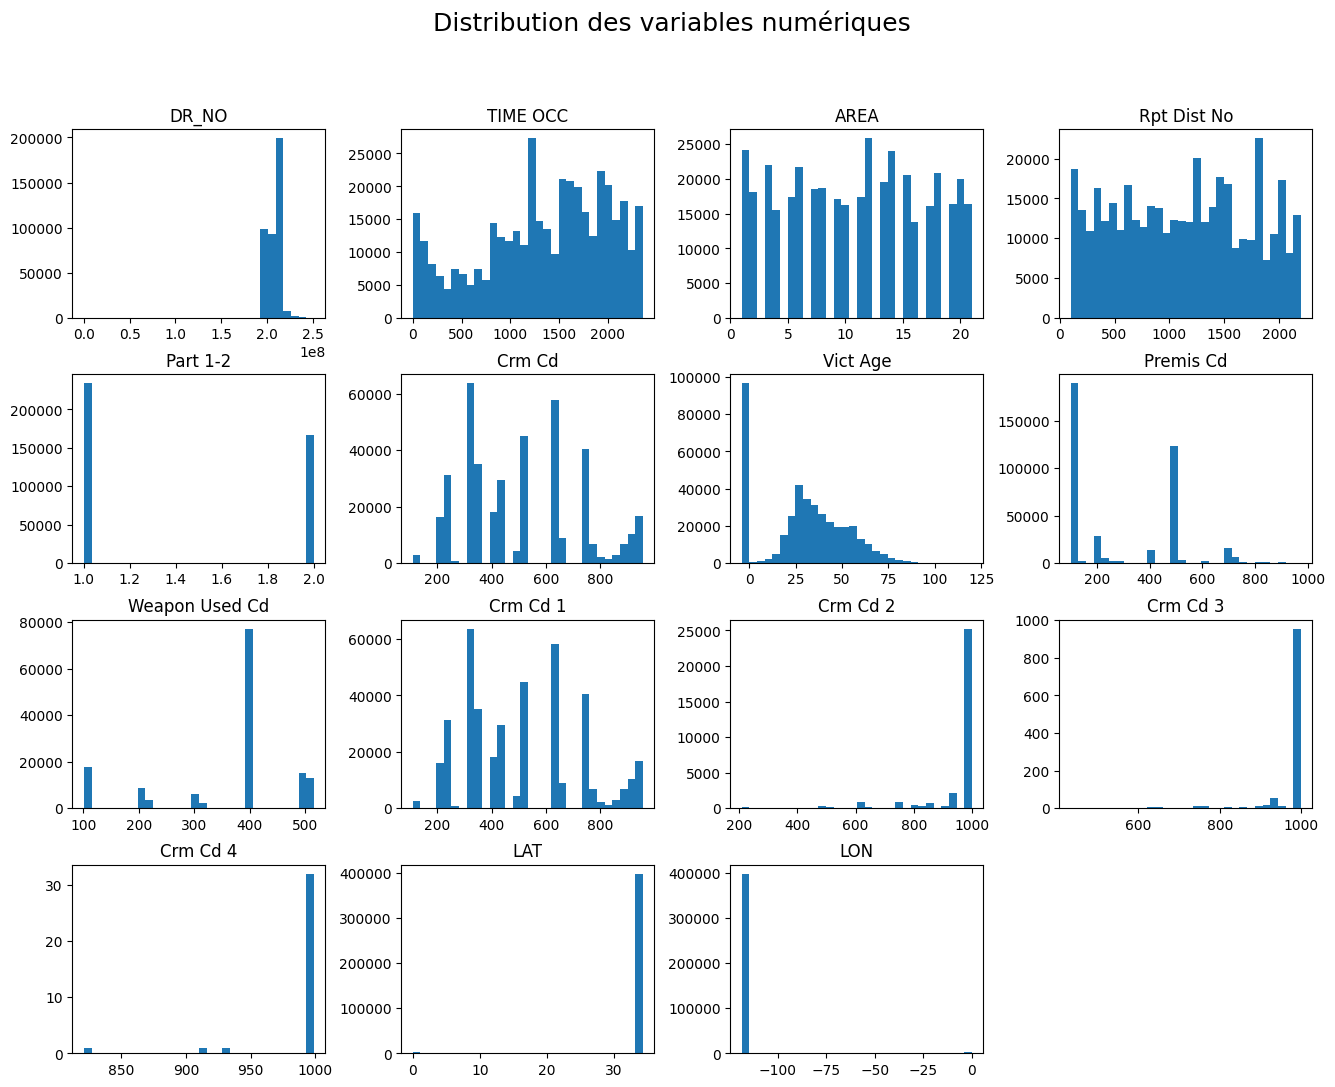

In [272]:
import matplotlib.pyplot as plt
import pandas as pd

# Sélection des colonnes numériques
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Histogrammes
df[numeric_cols].hist(
    bins=30,
    figsize=(16, 12),
    grid=False
)

plt.suptitle("Distribution des variables numériques", fontsize=18)
plt.show()


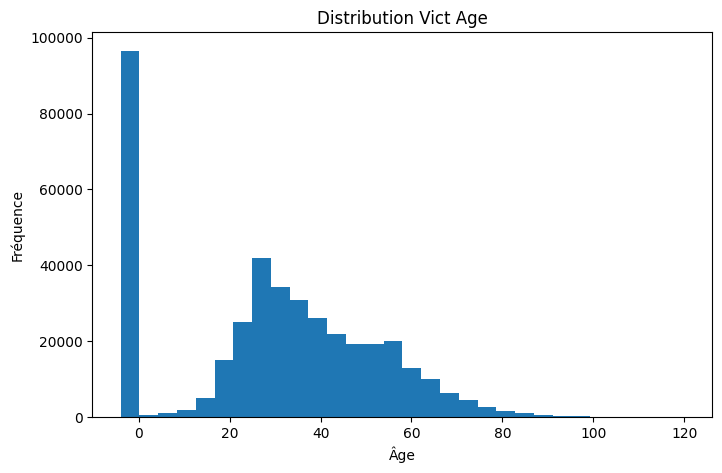

In [273]:
plt.figure(figsize=(8,5))
plt.hist(df['Vict Age'], bins=30)
plt.title("Distribution Vict Age")
plt.xlabel("Âge")
plt.ylabel("Fréquence")
plt.show()


In [274]:
df.head(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,2020-03-01,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,2020-02-09,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,2020-11-11,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,2023-05-10,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,2020-09-09,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


In [275]:
df.shape

(400000, 28)

# Data preprocessing steps :

## **Check the data types of the columns** :

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DR_NO           400000 non-null  int64         
 1   Date Rptd       400000 non-null  datetime64[ns]
 2   DATE OCC        400000 non-null  object        
 3   TIME OCC        400000 non-null  int64         
 4   AREA            400000 non-null  int64         
 5   AREA NAME       400000 non-null  object        
 6   Rpt Dist No     400000 non-null  int64         
 7   Part 1-2        400000 non-null  int64         
 8   Crm Cd          400000 non-null  int64         
 9   Crm Cd Desc     400000 non-null  object        
 10  Mocodes         344873 non-null  object        
 11  Vict Age        400000 non-null  int64         
 12  Vict Sex        347431 non-null  object        
 13  Vict Descent    347426 non-null  object        
 14  Premis Cd       399995 non-null  flo

In [277]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [278]:
df.columns = (
    df.columns
    .str.lower()               # tout en minuscule
    .str.replace(' ', '_')     # remplacer espace par _
    .str.replace('-', '_')     # remplacer tiret par _
    .str.replace('/', '_')     # remplacer slash par _
    .str.replace(r'[^a-z0-9_]', '', regex=True)  # enlever caractères spéciaux
)


In [279]:
# drop code crime 
df.drop("dr_no",axis=1,inplace=True)

In [280]:
df = df.rename(columns={"part_1_2": "crm_categories"})

In [281]:
df.head(5)

,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,crm_categories,crm_cd,crm_cd_desc,mocodes,vict_age,vict_sex,vict_descent,premis_cd,premis_desc,weapon_used_cd,weapon_desc,status,status_desc,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,location,cross_street,lat,lon
0,2020-03-01,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,2020-02-09,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,2020-11-11,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,2023-05-10,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,2020-09-09,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


In [282]:
df.columns

Index(['date_rptd', 'date_occ', 'time_occ', 'area', 'area_name', 'rpt_dist_no',
       'crm_categories', 'crm_cd', 'crm_cd_desc', 'mocodes', 'vict_age',
       'vict_sex', 'vict_descent', 'premis_cd', 'premis_desc',
       'weapon_used_cd', 'weapon_desc', 'status', 'status_desc', 'crm_cd_1',
       'crm_cd_2', 'crm_cd_3', 'crm_cd_4', 'location', 'cross_street', 'lat',
       'lon'],
      dtype='object')

# drop duplicated columns

In [283]:
df.duplicated().sum()

np.int64(1089)

In [284]:
df=df.drop_duplicates()

In [285]:
df.shape

(398911, 27)

# Type casting


In [286]:
# Conversion date
df['date_occ'] = pd.to_datetime(df['date_occ'], format="%m/%d/%Y %I:%M:%S %p")

# Features temporelles
df['Year']      = df['date_occ'].dt.year
df['Month']     = df['date_occ'].dt.month
df['Day']       = df['date_occ'].dt.day
df['Hour']      = df['time_occ'] // 100
df['Minute']    = df['time_occ'] % 100 
df['Weekday']   = df['date_occ'].dt.weekday  # 0 = lundi, 6 = dimanche
df['is_weekend']= df['Weekday'].isin([5, 6])

In [287]:
df.head()

,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,crm_categories,crm_cd,crm_cd_desc,mocodes,vict_age,vict_sex,vict_descent,premis_cd,premis_desc,weapon_used_cd,weapon_desc,status,status_desc,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,location,cross_street,lat,lon,Year,Month,Day,Hour,Minute,Weekday,is_weekend
0,2020-03-01,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506,2020,3,1,21,30,6,True
1,2020-02-09,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628,2020,2,8,18,0,5,True
2,2020-11-11,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002,2020,11,4,17,0,2,False
3,2023-05-10,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387,2020,3,10,20,37,1,False
4,2020-09-09,2020-09-09,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130,2020,9,9,6,30,2,False


## NAN values

In [288]:
df.isna().sum()

date_rptd              0
date_occ               0
time_occ               0
area                   0
area_name              0
rpt_dist_no            0
crm_categories         0
crm_cd                 0
crm_cd_desc            0
mocodes            54700
vict_age               0
vict_sex           52159
vict_descent       52164
premis_cd              5
premis_desc          157
weapon_used_cd    255894
weapon_desc       255894
status                 0
status_desc            0
crm_cd_1               4
crm_cd_2          367092
crm_cd_3          397821
crm_cd_4          398876
location               0
cross_street      329659
lat                    0
lon                    0
Year                   0
Month                  0
Day                    0
Hour                   0
Minute                 0
Weekday                0
is_weekend             0
dtype: int64

In [289]:
df.nunique()

date_rptd           1727
date_occ             750
time_occ            1439
area                  21
area_name             21
rpt_dist_no         1180
crm_categories         2
crm_cd               135
crm_cd_desc          135
mocodes           149615
vict_age             104
vict_sex               4
vict_descent          19
premis_cd            307
premis_desc          303
weapon_used_cd        78
weapon_desc           78
status                 5
status_desc            5
crm_cd_1             137
crm_cd_2             111
crm_cd_3              30
crm_cd_4               5
location           53590
cross_street        7538
lat                 5244
lon                 4918
Year                   3
Month                 12
Day                   31
Hour                  24
Minute                60
Weekday                7
is_weekend             2
dtype: int64

In [290]:
df['vict_descent'].fillna('UNKNOWN', inplace=True)

print("Number of null values:", df['vict_descent'].isnull().sum())

Number of null values: 0


C:\Users\yomna\AppData\Local\Temp\ipykernel_21884\234686060.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['vict_descent'].fillna('UNKNOWN', inplace=True)


In [291]:
df["vict_sex"].value_counts()
df['vict_sex'] = df['vict_sex'].fillna('X')
df['vict_sex'] = df['vict_sex'].replace({'H': 'X', '-': 'X'})


In [292]:
df["vict_sex"].value_counts()

vict_sex
M    168710
F    146094
X     84107
Name: count, dtype: int64

In [293]:
df["vict_descent"]= df['vict_descent'].replace({'-': 'UNKNOWN'})

In [294]:
mode_mocodes = df['mocodes'].mode()
if not mode_mocodes.empty:
    df['mocodes'] = df['mocodes'].fillna(mode_mocodes[0])
mode_premis = df['premis_cd'].mode()
if not mode_premis.empty:
    df['premis_cd'] = df['premis_cd'].fillna(mode_premis[0])
mode_premis = df['premis_desc'].mode()
if not mode_premis.empty:
    df['premis_desc'] = df['premis_desc'].fillna(mode_premis[0])
mode_status = df['status'].mode()
if not mode_status.empty:
    df['status'] = df['status'].fillna(mode_status[0])

In [295]:
import re
df['premis_desc'] = df['premis_desc'].str.title()

df['premis_desc'] = df['premis_desc'].str.replace(r'\(.*?\)', '', regex=True)

df['premis_desc'] = df['premis_desc'].apply(
    lambda x: re.sub(r'(?<=[a-z])(?=[A-Z])', ' ', str(x))
)

df['premis_desc'] = df['premis_desc'].str.strip()
df['premis_desc'] = df['premis_desc'].str.replace(r'\s+', ' ', regex=True)



In [296]:
df["premis_desc"]

0                         Street
1               Bus Stop/Layover
2            Multi-Unit Dwelling
3                 Clothing Store
4                         Street
                   ...          
399995    Single Family Dwelling
399996               Parking Lot
399997                     Hotel
399998                     Motel
399999       Multi-Unit Dwelling
Name: premis_desc, Length: 398911, dtype: object

In [297]:
df['weapon_desc'] = df['weapon_desc'].fillna('NO WEAPON')
df['weapon_used_cd'] = df['weapon_used_cd'].fillna(0.0)

In [298]:
#I will remove the columns Crm Cd 1 to Crm Cd 4 because they contain additional crime codes:
# Crm Cd 1 is usually identical to Crm Cd, and the others are almost entirely empty.
df.drop("crm_cd_1",axis=1,inplace=True)


In [299]:
threshold = 0.5

cols_to_drop = []

for col in df.columns:
    null_ratio = df[col].isnull().mean()
    if null_ratio > threshold:
        cols_to_drop.append(col)
        print(f"Dropping column '{col}' with {null_ratio*100:.2f}% null values")

df.drop(columns=cols_to_drop, inplace=True)

Dropping column 'crm_cd_2' with 92.02% null values
Dropping column 'crm_cd_3' with 99.73% null values
Dropping column 'crm_cd_4' with 99.99% null values
Dropping column 'cross_street' with 82.64% null values


In [300]:
df.isna().sum()

date_rptd         0
date_occ          0
time_occ          0
area              0
area_name         0
rpt_dist_no       0
crm_categories    0
crm_cd            0
crm_cd_desc       0
mocodes           0
vict_age          0
vict_sex          0
vict_descent      0
premis_cd         0
premis_desc       0
weapon_used_cd    0
weapon_desc       0
status            0
status_desc       0
location          0
lat               0
lon               0
Year              0
Month             0
Day               0
Hour              0
Minute            0
Weekday           0
is_weekend        0
dtype: int64

## transform categorical values

In [301]:
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)


Index(['area_name', 'crm_cd_desc', 'mocodes', 'vict_sex', 'vict_descent',
       'premis_desc', 'weapon_desc', 'status', 'status_desc', 'location'],
      dtype='object')


In [302]:
df[cat_cols]

,area_name,crm_cd_desc,mocodes,vict_sex,vict_descent,premis_desc,weapon_desc,status,status_desc,location
0,Wilshire,VEHICLE - STOLEN,0344,M,O,Street,NO WEAPON,AA,Adult Arrest,1900 S LONGWOOD AV
1,Central,BURGLARY FROM VEHICLE,1822 1402 0344,M,O,Bus Stop/Layover,NO WEAPON,IC,Invest Cont,1000 S FLOWER ST
2,Southwest,BIKE - STOLEN,0344 1251,X,X,Multi-Unit Dwelling,NO WEAPON,IC,Invest Cont,1400 W 37TH ST
3,Van Nuys,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,M,O,Clothing Store,NO WEAPON,IC,Invest Cont,14000 RIVERSIDE DR
4,Hollenbeck,VEHICLE - STOLEN,0344,X,UNKNOWN,Street,NO WEAPON,IC,Invest Cont,200 E AVENUE 28
...,...,...,...,...,...,...,...,...,...,...
399995,Southeast,THEFT OF IDENTITY,1822 0923 0924 0926 0930 0917 0935 0925 0927 0922,F,U,Single Family Dwelling,NO WEAPON,IC,Invest Cont,200 E 102ND ST
399996,Wilshire,VEHICLE - STOLEN,0344,X,UNKNOWN,Parking Lot,NO WEAPON,AA,Adult Arrest,2200 THURMAN AV
399997,Central,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329 1822,X,X,Hotel,NO WEAPON,IC,Invest Cont,100 E 3RD ST
399998,Foothill,BURGLARY,0344 1822,M,O,Motel,NO WEAPON,IC,Invest Cont,7900 FOOTHILL BL


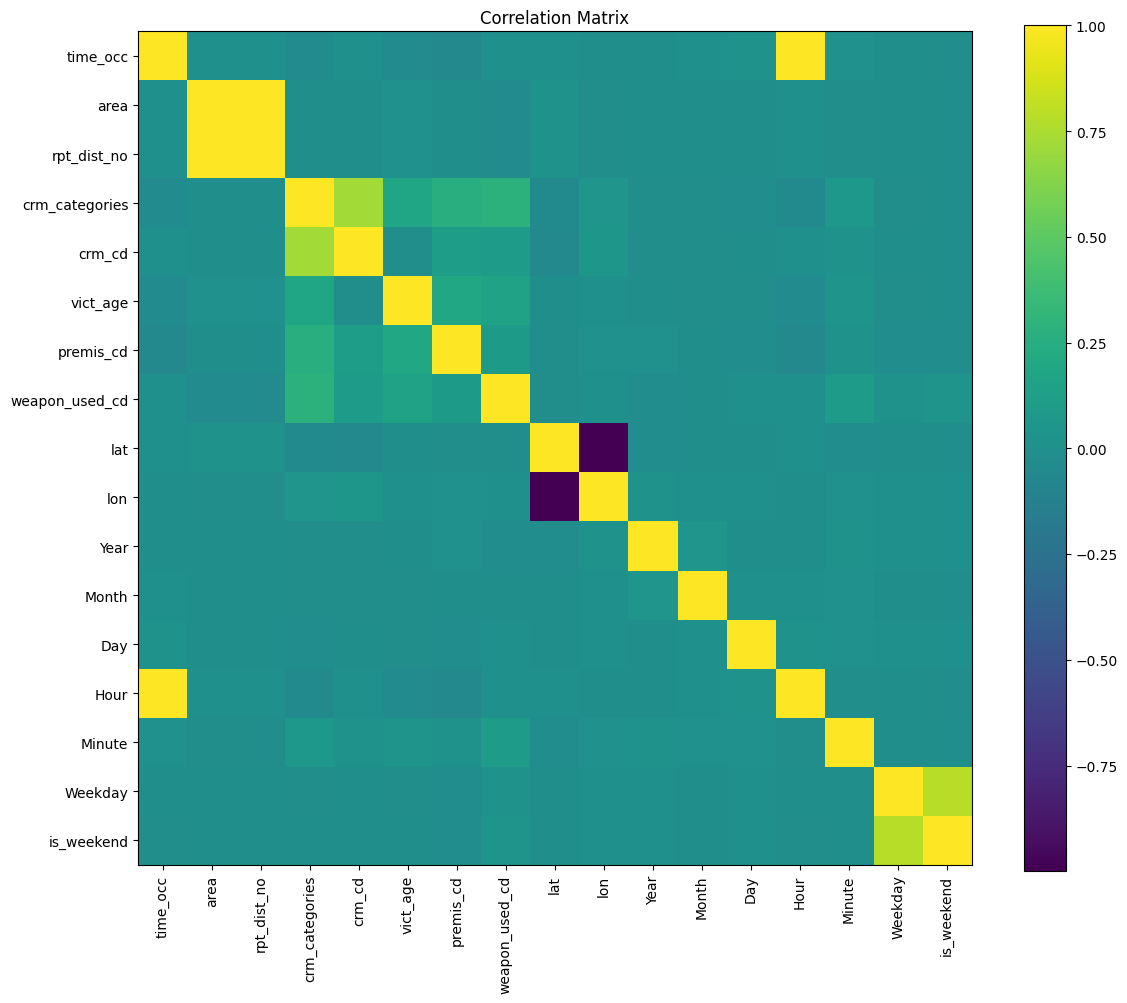

In [303]:
import matplotlib.pyplot as plt
import numpy as np

# Calcul de la matrice de corrélation
corr = df.corr(numeric_only=True)

# Affichage du graphique
plt.figure(figsize=(12, 10))
plt.imshow(corr, interpolation='nearest')
plt.colorbar()   # barre de couleurs automatique

# Ajouter les noms des colonnes
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


In [304]:
import numpy as np

# matrice de corrélation absolue
corr_matrix = df.corr(numeric_only=True).abs()

# sélectionner les valeurs au-dessus de 0.95 (hors diagonale)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# récupérer les colonnes fortement corrélées
high_corr = [
    (col, row, upper.loc[row, col])
    for col in upper.columns
    for row in upper.index
    if upper.loc[row, col] > 0.7
]

high_corr


[('rpt_dist_no', 'area', np.float64(0.9990277370123667)),
 ('crm_cd', 'crm_categories', np.float64(0.7243501003373511)),
 ('lon', 'lat', np.float64(0.9992386742097646)),
 ('Hour', 'time_occ', np.float64(0.999614240815744)),
 ('is_weekend', 'Weekday', np.float64(0.7836270806317045))]

In [305]:
cols=['is_weekend',]

In [306]:
df[["time_occ","Hour","Minute"]]

,time_occ,Hour,Minute
0,2130,21,30
1,1800,18,0
2,1700,17,0
3,2037,20,37
4,630,6,30
...,...,...,...
399995,1410,14,10
399996,1800,18,0
399997,630,6,30
399998,1200,12,0


In [307]:
df.columns

Index(['date_rptd', 'date_occ', 'time_occ', 'area', 'area_name', 'rpt_dist_no',
       'crm_categories', 'crm_cd', 'crm_cd_desc', 'mocodes', 'vict_age',
       'vict_sex', 'vict_descent', 'premis_cd', 'premis_desc',
       'weapon_used_cd', 'weapon_desc', 'status', 'status_desc', 'location',
       'lat', 'lon', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Weekday',
       'is_weekend'],
      dtype='object')

In [308]:
df[["area","area_name"]]

,area,area_name
0,7,Wilshire
1,1,Central
2,3,Southwest
3,9,Van Nuys
4,4,Hollenbeck
...,...,...
399995,18,Southeast
399996,7,Wilshire
399997,1,Central
399998,16,Foothill


In [309]:
df.dtypes

date_rptd         datetime64[ns]
date_occ          datetime64[ns]
time_occ                   int64
area                       int64
area_name                 object
rpt_dist_no                int64
crm_categories             int64
crm_cd                     int64
crm_cd_desc               object
mocodes                   object
vict_age                   int64
vict_sex                  object
vict_descent              object
premis_cd                float64
premis_desc               object
weapon_used_cd           float64
weapon_desc               object
status                    object
status_desc               object
location                  object
lat                      float64
lon                      float64
Year                       int32
Month                      int32
Day                        int32
Hour                       int64
Minute                     int64
Weekday                    int32
is_weekend                  bool
dtype: object

# encoding

In [310]:
def select_object_columns(df, cols):
    """
    Sélectionne uniquement les colonnes de type object dans la liste fournie.
    
    Parameters:
        df : pd.DataFrame
        cols : list of str, colonnes à filtrer

    Returns:
        list of str : colonnes de type object existantes dans df
    """
    return [col for col in cols if col in df.columns and df[col].dtype == 'object']




In [311]:
df["vict_descent"].value_counts()

vict_descent
H          122224
W           84964
B           57458
UNKNOWN     52164
X           35489
O           31991
A            8577
K            2040
F            1402
C            1129
J             446
V             338
I             294
Z             150
P              91
U              65
G              31
D              20
S              20
L              18
Name: count, dtype: int64

In [312]:
df["vict_sex"].value_counts()

vict_sex
M    168710
F    146094
X     84107
Name: count, dtype: int64

In [313]:
df = pd.get_dummies(df, columns=['vict_sex'], prefix='vict_sex', dtype=int)

In [314]:
# 1. Affiche les 3 colonnes qui viennent d'être créées
print("Colonnes créées pour vict_sex :")
vict_sex_columns = [col for col in df.columns if col.startswith('vict_sex_')]
print(vict_sex_columns)

# 2. Vérifie les sommes (doit correspondre à tes valeurs initiales)
print("\nVérification des comptes :")
print(df[vict_sex_columns].sum())

Colonnes créées pour vict_sex :
['vict_sex_F', 'vict_sex_M', 'vict_sex_X']

Vérification des comptes :
vict_sex_F    146094
vict_sex_M    168710
vict_sex_X     84107
dtype: int64


In [315]:
from sklearn.preprocessing import LabelEncoder
le_descent = LabelEncoder()
df['Vict_Descent_LE'] = le_descent.fit_transform(df['vict_descent'])

In [316]:
cols_to_keep = [
    'Year','Month','Day','Hour','Minute','area', 'rpt_dist_no', 'crm_categories',
    'crm_cd', 'vict_age', 'Vict_Descent_LE',
    'premis_cd', 'weapon_used_cd', 'lat', 'lon'
]
cols_to_keep += ['vict_sex_F', 'vict_sex_M', 'vict_sex_X']

In [317]:
df_final = df[cols_to_keep].copy()

print(df_final.head())
print(df_final.shape)

   Year  Month  Day  Hour  Minute  area  rpt_dist_no  crm_categories  crm_cd  \
0  2020      3    1    21      30     7          784               1     510   
1  2020      2    8    18       0     1          182               1     330   
2  2020     11    4    17       0     3          356               1     480   
3  2020      3   10    20      37     9          964               1     343   
4  2020      9    9     6      30     4          413               1     510   

   vict_age  Vict_Descent_LE  premis_cd  weapon_used_cd      lat       lon  \
0         0               11      101.0             0.0  34.0375 -118.3506   
1        47               11      128.0             0.0  34.0444 -118.2628   
2        19               18      502.0             0.0  34.0210 -118.3002   
3        19               11      405.0             0.0  34.1576 -118.4387   
4         0               15      101.0             0.0  34.0820 -118.2130   

   vict_sex_F  vict_sex_M  vict_sex_X  
0         

In [318]:
df_final.head()

,Year,Month,Day,Hour,Minute,area,rpt_dist_no,crm_categories,crm_cd,vict_age,Vict_Descent_LE,premis_cd,weapon_used_cd,lat,lon,vict_sex_F,vict_sex_M,vict_sex_X
0,2020,3,1,21,30,7,784,1,510,0,11,101.0,0.0,34.0375,-118.3506,0,1,0
1,2020,2,8,18,0,1,182,1,330,47,11,128.0,0.0,34.0444,-118.2628,0,1,0
2,2020,11,4,17,0,3,356,1,480,19,18,502.0,0.0,34.0210,-118.3002,0,0,1
3,2020,3,10,20,37,9,964,1,343,19,11,405.0,0.0,34.1576,-118.4387,0,1,0
4,2020,9,9,6,30,4,413,1,510,0,15,101.0,0.0,34.0820,-118.2130,0,0,1


In [319]:
df_final.dtypes

Year                 int32
Month                int32
Day                  int32
Hour                 int64
Minute               int64
area                 int64
rpt_dist_no          int64
crm_categories       int64
crm_cd               int64
vict_age             int64
Vict_Descent_LE      int64
premis_cd          float64
weapon_used_cd     float64
lat                float64
lon                float64
vict_sex_F           int64
vict_sex_M           int64
vict_sex_X           int64
dtype: object

## target construction 

In [320]:
def categorize_crime(crime):
    crime = crime.upper()

    # 1️⃣ السرقة والسطو / Theft and Burglary
    if any(x in crime for x in [
        'VEHICLE - STOLEN', 'BURGLARY FROM VEHICLE', 'BIKE - STOLEN',
        'SHOPLIFTING-GRAND THEFT', 'BURGLARY', 'THEFT-GRAND', 'BUNCO, GRAND THEFT',
        'THEFT PLAIN', 'THEFT FROM MOTOR VEHICLE', 'TILL TAP', 'BOAT - STOLEN',
        'DISHONEST EMPLOYEE', 'PURSE SNATCHING', 'PETTY THEFT - AUTO REPAIR',
        'SHOPLIFTING - PETTY THEFT', 'THEFT FROM PERSON', 'BUNCO, PETTY THEFT',
        'THEFT, PERSON', 'THEFT, COIN MACHINE', 'GRAND THEFT / AUTO REPAIR',
        'BIKE - ATTEMPTED STOLEN', 'VEHICLE - ATTEMPT STOLEN',
        'VEHICLE, STOLEN - OTHER', 'PICKPOCKET', 'SHOPLIFTING - ATTEMPT',
        'BUNCO, ATTEMPT', 'PICKPOCKET, ATTEMPT'
    ]):
        return 'السرقة والسطو / Theft and Burglary'

    # 2️⃣ العنف والاعتداء / Violence and Assault
    elif any(x in crime for x in [
        'ASSAULT', 'BATTERY', 'ROBBERY', 'KIDNAPPING', 'CRIMINAL HOMICIDE',
        'MANSLAUGHTER', 'ATTEMPTED ROBBERY', 'INTIMATE PARTNER - SIMPLE ASSAULT',
        'INTIMATE PARTNER - AGGRAVATED ASSAULT', 'OTHER ASSAULT',
        'BATTERY POLICE', 'BATTERY ON A FIREFIGHTER',
        'EXTORTION', 'FALSE IMPRISONMENT', 'STALKING',
        'CHILD', 'CHILD ABUSE', 'CHILD NEGLECT', 'CHILD ANNOYING',
        'CHILD STEALING', 'DISRUPT SCHOOL', 'DRUGS, TO A MINOR',
        'CRM AGNST CHLD',
        'CONTRIBUTING', 'TRAIN WRECKING', 'FAILURE TO DISPERSE', 'BLOCKING DOOR INDUCTION CENTER'
    ]):
        return 'العنف والاعتداء / Violence and Assault'

    # 3️⃣ التخريب والتدمير / Vandalism and Destruction
    elif any(x in crime for x in [
        'VANDALISM', 'ARSON', 'SHOTS FIRED', 'THROWING OBJECT', 'DAMAGE', 'BOMB SCARE','DISTURBING THE PEACE'
    ]):
        return 'التخريب والتدمير / Vandalism and Destruction'

    # 4️⃣ الاحتيال والتزوير / Fraud and Forgery
    elif any(x in crime for x in [
        'CREDIT CARDS', 'EMBEZZLEMENT', 'DEFRAUDING', 'THEFT OF SERVICES',
        'DOCUMENT WORTHLESS', 'GRAND THEFT / INSURANCE FRAUD', 'THEFT OF IDENTITY'
    ]):
        return 'الاحتيال والتزوير / Fraud and Forgery'

    # 5️⃣ المخالفات القانونية والجرائم المتعلقة بالأسلحة / Legal Offences & Weapons
    elif any(x in crime for x in [
        'COURT ORDER', 'VIOLATION OF COURT', 'CONTEMPT', 'FALSE POLICE REPORT',
        'DOCUMENT FORGERY', 'COUNTERFEIT', 'BRIBERY', 'CONSPIRACY', 'THREATENING PHONE CALLS',
        'VIOLATION OF RESTRAINING ORDER', 'VIOLATION OF TEMPORARY RESTRAINING ORDER',
        'TRESPASSING', 'RESISTING ARREST', 'UNAUTHORIZED COMPUTER ACCESS',
        'WEAPON', 'FIREARM', 'BRANDISH', 'DISCHARGE', 'REPLICA FIREARMS', 'FIREARMS RESTRAINING ORDER'
    ]):
        return 'المخالفات القانونية والجرائم المتعلقة بالأسلحة / Legal Offences & Weapons'

    # 6️⃣ الجرائم الجنسية والاتجار / Sexual Crimes & Exploitation
    elif any(x in crime for x in [
        'RAPE', 'SEX', 'INDECENT', 'LEWD', 'SODOMY', 'ORAL COPULATION',
        'SEXUAL PENETRATION', 'CHILD PORNOGRAPHY', 'HUMAN TRAFFICKING',
        'BATTERY WITH SEXUAL CONTACT', 'BEASTIALITY', 'INCEST', 'PEEPING TOM', 'BIGAMY',
        'TRAFFICKING', 'PIMPING', 'PANDERING'
    ]):
        return 'الجرائم الجنسية والاتجار / Sexual Crimes & Exploitation'

    

    # 8️⃣ جرائم متنوعة / Miscellaneous Crimes
    elif any(x in crime for x in [
        'OTHER MISCELLANEOUS CRIME', 'ANIMAL', 'CRUELTY', 'ILLEGAL DUMPING',
        'LYNCHING', 'INCITING', 'THREAT', 'PROWLER', 'INCITING A RIOT','DRIVING', 'RECKLESS', 'FAILURE TO YIELD', 'DRUNK'
    ]):
        return 'جرائم متنوعة / Miscellaneous Crimes'

    # Default
    return 'جرائم متنوعة / Miscellaneous Crimes'

# Apply to DataFrame
df_final['Crime_Class'] = df1['Crm Cd Desc'].apply(categorize_crime)



In [321]:
df_final.head()

,Year,Month,Day,Hour,Minute,area,rpt_dist_no,crm_categories,crm_cd,vict_age,Vict_Descent_LE,premis_cd,weapon_used_cd,lat,lon,vict_sex_F,vict_sex_M,vict_sex_X,Crime_Class
0,2020,3,1,21,30,7,784,1,510,0,11,101.0,0.0,34.0375,-118.3506,0,1,0,السرقة والسطو / Theft and Burglary
1,2020,2,8,18,0,1,182,1,330,47,11,128.0,0.0,34.0444,-118.2628,0,1,0,السرقة والسطو / Theft and Burglary
2,2020,11,4,17,0,3,356,1,480,19,18,502.0,0.0,34.0210,-118.3002,0,0,1,السرقة والسطو / Theft and Burglary
3,2020,3,10,20,37,9,964,1,343,19,11,405.0,0.0,34.1576,-118.4387,0,1,0,السرقة والسطو / Theft and Burglary
4,2020,9,9,6,30,4,413,1,510,0,15,101.0,0.0,34.0820,-118.2130,0,0,1,السرقة والسطو / Theft and Burglary


In [322]:
# Comptage des catégories
crime_counts = df_final['Crime_Class'].value_counts()

# Calcul des pourcentages
crime_percent = crime_counts / crime_counts.sum() * 100

# Affichage propre
crime_percent = crime_percent.round(2)  # Arrondi à 2 décimales

print(crime_percent)

Crime_Class
السرقة والسطو / Theft and Burglary                                           44.56
العنف والاعتداء / Violence and Assault                                       27.67
التخريب والتدمير / Vandalism and Destruction                                 10.93
المخالفات القانونية والجرائم المتعلقة بالأسلحة / Legal Offences & Weapons     8.05
الاحتيال والتزوير / Fraud and Forgery                                         5.47
الجرائم الجنسية والاتجار / Sexual Crimes & Exploitation                       2.27
جرائم متنوعة / Miscellaneous Crimes                                           1.04
Name: count, dtype: float64


In [323]:
from sklearn.preprocessing import LabelEncoder

# 1. Création du LabelEncoder et encodage de la cible
le = LabelEncoder()
df_final['Crime_Class_Enc'] = le.fit_transform(df_final['Crime_Class'])   

In [324]:
# 2. Affichage clair du mapping (c'est ce que tu veux !)
print(" Mapping des classes (Label Encoding) ".center(60, "="))
print(f"{'Code':<6} {'Classe':<50}")
print("-" * 60)
for code, classe in enumerate(le.classes_):
    print(f"{code:<6} → {classe}")
print("=" * 60)

=========== Mapping des classes (Label Encoding) ===========
Code   Classe                                            
------------------------------------------------------------
0      → الاحتيال والتزوير / Fraud and Forgery
1      → التخريب والتدمير / Vandalism and Destruction
2      → الجرائم الجنسية والاتجار / Sexual Crimes & Exploitation
3      → السرقة والسطو / Theft and Burglary
4      → العنف والاعتداء / Violence and Assault
5      → المخالفات القانونية والجرائم المتعلقة بالأسلحة / Legal Offences & Weapons
6      → جرائم متنوعة / Miscellaneous Crimes


In [325]:
# 3. Vérification rapide sur les 10 premières lignes
print("\nAperçu du résultat :")
display(df_final[['Crime_Class', 'Crime_Class_Enc']].head(10))


Aperçu du résultat :


,Crime_Class,Crime_Class_Enc
0,السرقة والسطو / Theft and Burglary,3
1,السرقة والسطو / Theft and Burglary,3
2,السرقة والسطو / Theft and Burglary,3
3,السرقة والسطو / Theft and Burglary,3
4,السرقة والسطو / Theft and Burglary,3
5,السرقة والسطو / Theft and Burglary,3
6,التخريب والتدمير / Vandalism and Destruction,1
7,السرقة والسطو / Theft and Burglary,3
8,السرقة والسطو / Theft and Burglary,3
9,السرقة والسطو / Theft and Burglary,3


In [326]:
# 4. Bonus : compter chaque classe (pour voir le déséquilibre)
print("\nRépartition des classes :")
print(df_final['Crime_Class_Enc'].value_counts().sort_index())


Répartition des classes :
Crime_Class_Enc
0     21840
1     43616
2      9071
3    177764
4    110374
5     32096
6      4150
Name: count, dtype: int64


## split data 

In [327]:
df_final.head()

,Year,Month,Day,Hour,Minute,area,rpt_dist_no,crm_categories,crm_cd,vict_age,Vict_Descent_LE,premis_cd,weapon_used_cd,lat,lon,vict_sex_F,vict_sex_M,vict_sex_X,Crime_Class,Crime_Class_Enc
0,2020,3,1,21,30,7,784,1,510,0,11,101.0,0.0,34.0375,-118.3506,0,1,0,السرقة والسطو / Theft and Burglary,3
1,2020,2,8,18,0,1,182,1,330,47,11,128.0,0.0,34.0444,-118.2628,0,1,0,السرقة والسطو / Theft and Burglary,3
2,2020,11,4,17,0,3,356,1,480,19,18,502.0,0.0,34.0210,-118.3002,0,0,1,السرقة والسطو / Theft and Burglary,3
3,2020,3,10,20,37,9,964,1,343,19,11,405.0,0.0,34.1576,-118.4387,0,1,0,السرقة والسطو / Theft and Burglary,3
4,2020,9,9,6,30,4,413,1,510,0,15,101.0,0.0,34.0820,-118.2130,0,0,1,السرقة والسطو / Theft and Burglary,3


In [328]:
import os
import pickle
import pandas as pd

In [329]:
target_col = 'Crime_Class_Enc'
drop_cols = ['Crime_Class_Enc', 'Crime_Class','crm_cd']

In [330]:
X = df_final.drop(columns=drop_cols, axis=1)
y = df_final[target_col]

In [331]:
# Identification des colonnes numériques (utile pour le futur RobustScaler)
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"Colonnes numériques identifiées pour scaling futur : {len(numeric_cols)}")

Features (X) shape: (398911, 17)
Target (y) shape: (398911,)
Colonnes numériques identifiées pour scaling futur : 17


In [332]:
# --- 3. Sauvegarde des Processeurs et Données ---
print("\n" + "=" * 80)
print("SAUVEGARDE POUR L'ÉTAPE DE MODELING")
print("=" * 80)

os.makedirs("processors", exist_ok=True)

# A. Sauvegarder X et y (Complets, sans split ni scaling pour l'instant)
# Cela permet au notebook de modeling de faire ses propres splits dynamiques.
data_package = {
    "X": X,
    "y": y,
    "numeric_cols": numeric_cols,  # On passe l'info pour faciliter le scaling plus tard
    "categorical_cols": [c for c in X.columns if c not in numeric_cols]
}
with open("processors/data_for_modeling.pkl", "wb") as f:
    pickle.dump(data_package, f)
print("✓ Données X et y sauvegardées (brutes, prêtes pour optimisation)")

# B. Sauvegarder le LabelEncoder (C'est safe, ça ne dépend pas du train/test)
with open("processors/label_encoder_target.pkl", "wb") as f:
    pickle.dump(le, f)
print("✓ LabelEncoder de la cible sauvegardé")

# C. Sauvegarder le mapping cible (Dictionnaire lisible pour humain)
target_mapping = {
    "classes": list(le.classes_),
    "mapping": {cls: int(le.transform([cls])[0]) for cls in le.classes_}
}
with open("processors/target_mapping.pkl", "wb") as f:
    pickle.dump(target_mapping, f)
print("✓ Mapping cible (Dictionnaire) sauvegardé")

# D. Sauvegarder la config des features (Liste des colonnes pour vérifier l'ordre plus tard)
feature_config = {
    "final_features": list(X.columns),
    "target_name": target_col
}
with open("processors/features_config.pkl", "wb") as f:
    pickle.dump(feature_config, f)
print("✓ Configuration des colonnes sauvegardée")

print("\n🚀 PRÊT POUR LE MODELING ! Vous pouvez passer au notebook suivant.")


SAUVEGARDE POUR L'ÉTAPE DE MODELING
✓ Données X et y sauvegardées (brutes, prêtes pour optimisation)
✓ LabelEncoder de la cible sauvegardé
✓ Mapping cible (Dictionnaire) sauvegardé
✓ Configuration des colonnes sauvegardée

🚀 PRÊT POUR LE MODELING ! Vous pouvez passer au notebook suivant.


In [333]:
# Dictionnaire avec description des colonnes
features_description = {
    'DR_NO': {
        'Type': 'Integer',
        'Description': 'Numéro unique du rapport de crime',
        'Utilité': 'Identification et traçabilité de chaque rapport'
    },
    'Date Rptd': {
        'Type': 'Datetime',
        'Description': 'Date et heure où le crime a été rapporté',
        'Utilité': 'Permet d’analyser la temporalité des crimes'
    },
    'DATE OCC': {
        'Type': 'Datetime',
        'Description': 'Date et heure de l’occurrence du crime',
        'Utilité': 'Étude des tendances horaires et journalières'
    },
    'TIME OCC': {
        'Type': 'Integer',
        'Description': 'Heure approximative du crime (format 24h)',
        'Utilité': 'Analyse temporelle plus fine des crimes'
    },
    'AREA': {
        'Type': 'Integer',
        'Description': 'Code numérique de la zone LAPD',
        'Utilité': 'Identification de la zone géographique'
    },
    'AREA NAME': {
        'Type': 'String',
        'Description': 'Nom de la zone/division LAPD',
        'Utilité': 'Analyse par quartier ou secteur'
    },
    'Rpt Dist No': {
        'Type': 'Integer',
        'Description': 'Numéro du district de reporting',
        'Utilité': 'Permet de regrouper par district'
    },
    'Part 1-2': {
        'Type': 'Integer',
        'Description': 'Type de crime : 1 = sérieux, 2 = moins sérieux',
        'Utilité': 'Classification rapide de la gravité'
    },
    'Crm Cd': {
        'Type': 'Integer',
        'Description': 'Code numérique du crime',
        'Utilité': 'Référence standardisée pour chaque crime'
    },
    'Crm Cd Desc': {
        'Type': 'String',
        'Description': 'Description textuelle du crime',
        'Utilité': 'Compréhension qualitative du type de crime'
    },
    'Mocodes': {
        'Type': 'String',
        'Description': 'Modus Operandi : comment le crime a été commis',
        'Utilité': 'Analyse des méthodes utilisées'
    },
    'Vict Age': {
        'Type': 'Integer',
        'Description': 'Âge de la victime',
        'Utilité': 'Étude démographique des victimes'
    },
    'Vict Sex': {
        'Type': 'String',
        'Description': 'Sexe de la victime (F = Female, M = Male)',
        'Utilité': 'Analyse selon le genre'
    },
    'Vict Descent': {
        'Type': 'String',
        'Description': 'Origine ethnique de la victime',
        'Utilité': 'Étude démographique / socio-culturelle'
    },
    'Premis Cd': {
        'Type': 'Float',
        'Description': 'Code du type de lieu',
        'Utilité': 'Identification du type de lieu du crime'
    },
    'Premis Desc': {
        'Type': 'String',
        'Description': 'Description du lieu du crime',
        'Utilité': 'Compréhension qualitative de l’environnement'
    },
    'Weapon Used Cd': {
        'Type': 'Float',
        'Description': 'Code de l’arme utilisée',
        'Utilité': 'Classification standardisée de l’arme'
    },
    'Weapon Desc': {
        'Type': 'String',
        'Description': 'Arme utilisée ou mode d’agression',
        'Utilité': 'Analyse qualitative des armes ou techniques'
    },
    'Status': {
        'Type': 'String',
        'Description': 'Code du statut de l’affaire',
        'Utilité': 'Suivi du traitement du crime'
    },
    'Status Desc': {
        'Type': 'String',
        'Description': 'Statut textuel de l’affaire',
        'Utilité': 'Compréhension qualitative du statut'
    },
    'Crm Cd 1-4': {
        'Type': 'Float',
        'Description': 'Codes supplémentaires si plusieurs crimes ont eu lieu',
        'Utilité': 'Gestion des crimes multiples dans un même rapport'
    },
    'LOCATION': {
        'Type': 'String',
        'Description': 'Adresse approximative du crime',
        'Utilité': 'Localisation géographique pour analyse spatiale'
    },
    'Cross Street': {
        'Type': 'String',
        'Description': 'Rue croisée proche (si renseignée)',
        'Utilité': 'Référence pour la localisation précise'
    },
    'LAT': {
        'Type': 'Float',
        'Description': 'Latitude GPS',
        'Utilité': 'Analyse spatiale / cartographie'
    },
    'LON': {
        'Type': 'Float',
        'Description': 'Longitude GPS',
        'Utilité': 'Analyse spatiale / cartographie'
    }
}
        


In [334]:
# Affichage dans le notebook
for feature, info in features_description.items():
    print(f"\n📌 {feature}")
    print(f"   Type: {info['Type']}")
    print(f"   Description: {info['Description']}")
    print(f"   Utilité: {info['Utilité']}")


📌 DR_NO
   Type: Integer
   Description: Numéro unique du rapport de crime
   Utilité: Identification et traçabilité de chaque rapport

📌 Date Rptd
   Type: Datetime
   Description: Date et heure où le crime a été rapporté
   Utilité: Permet d’analyser la temporalité des crimes

📌 DATE OCC
   Type: Datetime
   Description: Date et heure de l’occurrence du crime
   Utilité: Étude des tendances horaires et journalières

📌 TIME OCC
   Type: Integer
   Description: Heure approximative du crime (format 24h)
   Utilité: Analyse temporelle plus fine des crimes

📌 AREA
   Type: Integer
   Description: Code numérique de la zone LAPD
   Utilité: Identification de la zone géographique

📌 AREA NAME
   Type: String
   Description: Nom de la zone/division LAPD
   Utilité: Analyse par quartier ou secteur

📌 Rpt Dist No
   Type: Integer
   Description: Numéro du district de reporting
   Utilité: Permet de regrouper par district

📌 Part 1-2
   Type: Integer
   Description: Type de crime : 1 = sérieux,